<a href="https://colab.research.google.com/github/PyBeginner1/WineQualityPrediction/blob/main/WinePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
wine = pd.read_csv('/content/winequality-red.csv')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


No. of Rows & Cols

In [6]:
wine.shape

(1599, 12)

Check Null Values

In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Statistical Info about the data

In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Mean of each wine quality

In [9]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [10]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Data Visualization

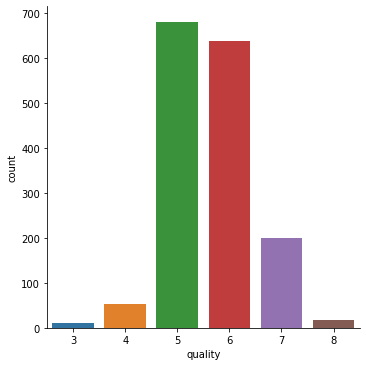

In [11]:
#catplot for count of each quality
sns.catplot(x = 'quality', data = wine, kind ='count')

In [13]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Volatile Acidity vs Quality

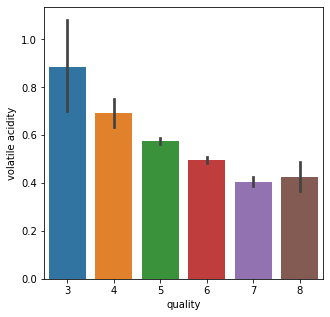

In [15]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='volatile acidity', data = wine)

fixed acidity vs qulaity

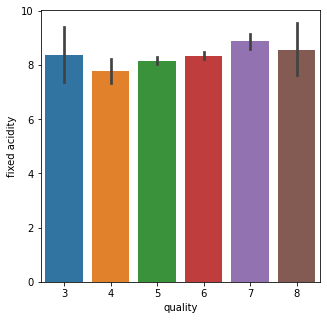

In [17]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='fixed acidity', data = wine)

citric acid	vs quality


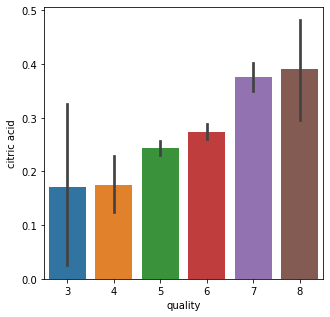

In [19]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='citric acid', data = wine)

residual sugar vs quality

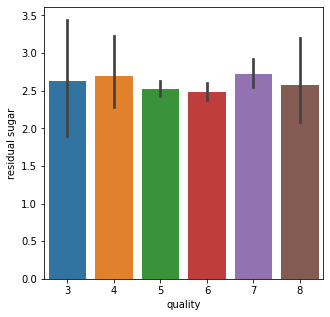

In [20]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='residual sugar', data = wine)

chlorides vs quality

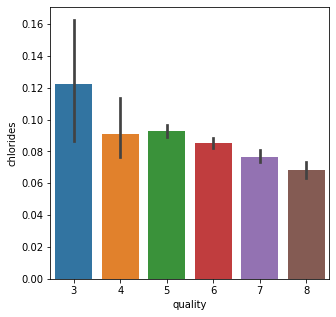

In [21]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='chlorides', data = wine)

free sulfur dioxide vs quality

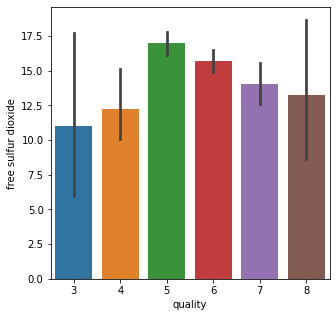

In [22]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='free sulfur dioxide', data = wine)

total sulfur dioxide vs quality

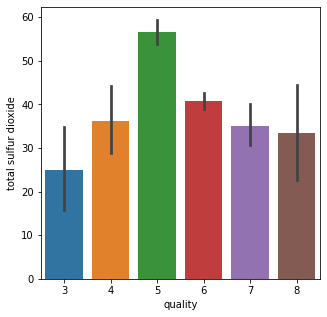

In [23]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='total sulfur dioxide', data = wine)

density vs quality

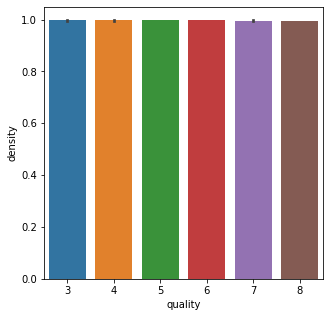

In [24]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='density', data = wine)

pH vs quality

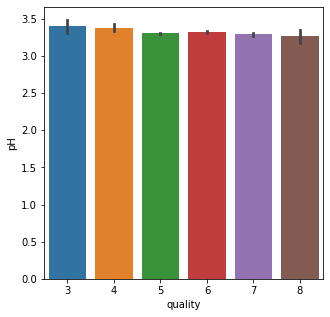

In [26]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='pH', data = wine)

sulphates vs quality

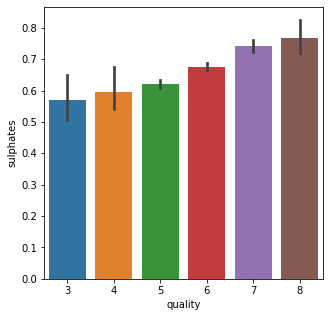

In [27]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='sulphates', data = wine)

alcohol vs quality

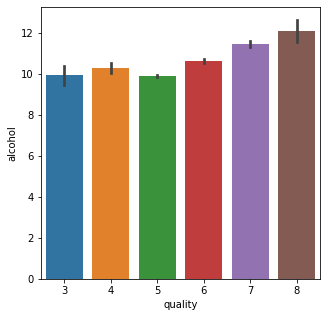

In [28]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y ='alcohol', data = wine)

Finding Correlation

In [29]:
correlation = wine.corr()

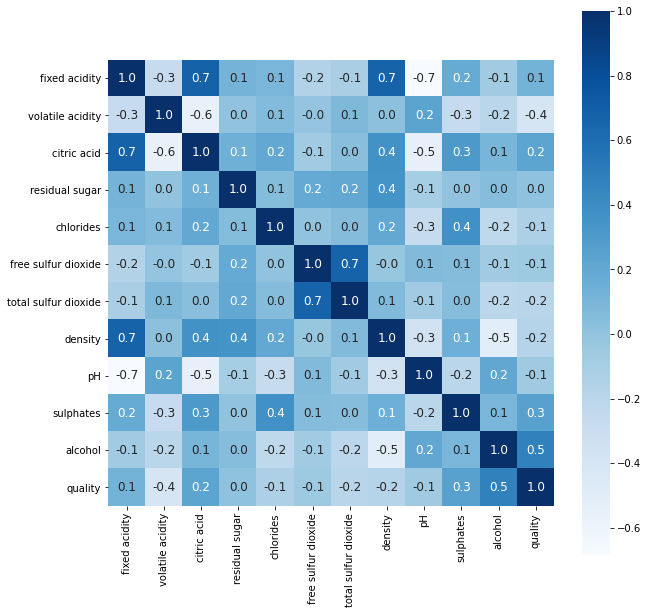

In [41]:
#using heatmap to find correl between columns 
plt.figure(figsize =(10,10))
sns.heatmap(correlation, square = True, cbar = True, cmap ='Blues', fmt='.1f', annot = True, annot_kws={'size': 12})

Data Pre-processing

In [43]:
X = wine.drop('quality', axis = 1)

In [44]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

Label Binarization

if quality >= 7 ---> Good(1)

if quality <= 6 --->Bad(0)

In [45]:
Y = wine['quality'].apply(lambda y_val: 1 if y_val >= 7 else 0)

In [46]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & Test Data Split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [50]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training

**Random Forest Classifier**

In [53]:
model = RandomForestClassifier()

Training our model

In [54]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model Evaluation

Accuracy Score

In [63]:
test_data_pred = model.predict(X_test)
score = accuracy_score(Y_test,test_data_pred)
print("Accuracy of testing model is ---> ",score)

Accuracy of testing model is --->  0.95


Making a Predictive System

In [70]:
input_data = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)

#converting to numpy array
input_data_array = np.asarray(input_data)

#reshape
input_data_reshape = input_data_array.reshape(1, -1)

#predicting
prediction = model.predict(input_data_reshape)

if prediction == 1:
  print("Thats a Good Wine!!!")
else:
  print("Thats Bad Wine!!!")

Thats a Good Wine!!!


In [71]:
input_data = (11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8)

#converting to numpy array
input_data_array = np.asarray(input_data)

#reshape
input_data_reshape = input_data_array.reshape(1, -1)

#predicting
prediction = model.predict(input_data_reshape)

if prediction == 1:
  print("Thats a Good Wine!!!")
else:
  print("Thats a Bad Wine!!!")

Thats a Bad Wine!!!
